In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("D:\\DATASETS\\GOAT.xlsx",parse_dates=['date'])

In [3]:
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,Adilabad,2018-01-01,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,2018-01-02,0.0,11.2,34.8,29.8,74.6,0.0,4.8
2,Adilabad,2018-01-03,0.0,17.3,38.0,31.8,71.5,0.0,3.4
3,Adilabad,2018-01-04,0.0,27.3,41.0,24.9,75.6,0.0,7.7
4,Adilabad,2018-01-05,0.0,28.7,43.2,27.7,48.9,0.0,13.5


In [4]:
df=df.resample('M',on='date').mean()

In [5]:
df

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
date,,,,,,,
2018-01-31,1.151613,15.241935,33.187097,40.567742,79.909677,0.051613,6.896774
2018-02-28,1.350000,19.053571,34.964286,43.907143,80.328571,0.007143,6.846429
2018-03-31,0.370968,21.493548,36.445161,39.716129,72.570968,0.003226,6.293548
2018-04-30,0.093333,24.910000,38.920000,37.963333,68.506667,0.030000,8.373333
2018-05-31,1.532258,26.441935,40.070968,39.064516,71.164516,0.296774,9.967742
2018-06-30,3.586667,24.420000,35.080000,55.486667,82.226667,0.440000,10.196667
2018-07-31,6.858065,23.596774,31.577419,65.890323,87.141935,0.529032,9.464516
2018-08-31,9.422581,22.738710,31.145161,68.932258,92.670968,0.593548,8.354839
2018-09-30,4.303333,22.630000,33.913333,53.756667,91.666667,0.063333,8.320000


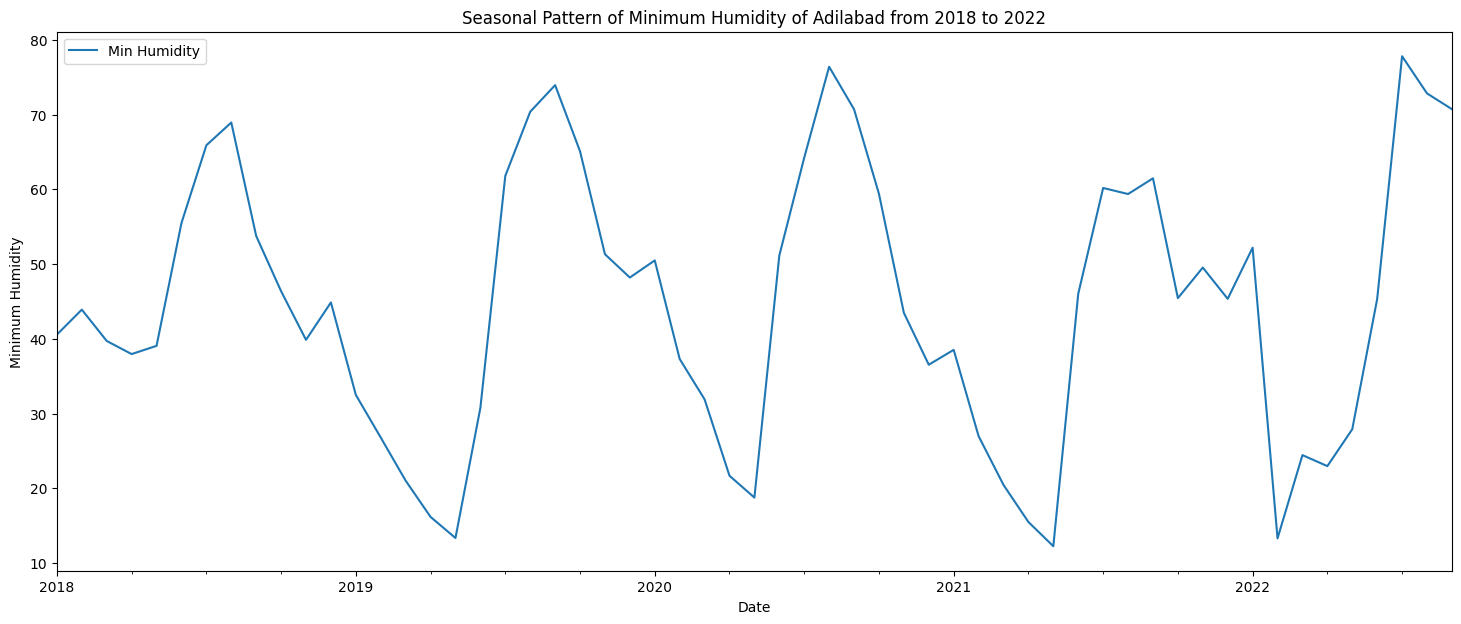

In [6]:
df['humidity_min'].plot(figsize=(18,7))
plt.title("Seasonal Pattern of Minimum Humidity of Adilabad from 2018 to 2022")
plt.xlabel("Date")
plt.ylabel("Minimum Humidity")
plt.legend(['Min Humidity'])
plt.show()

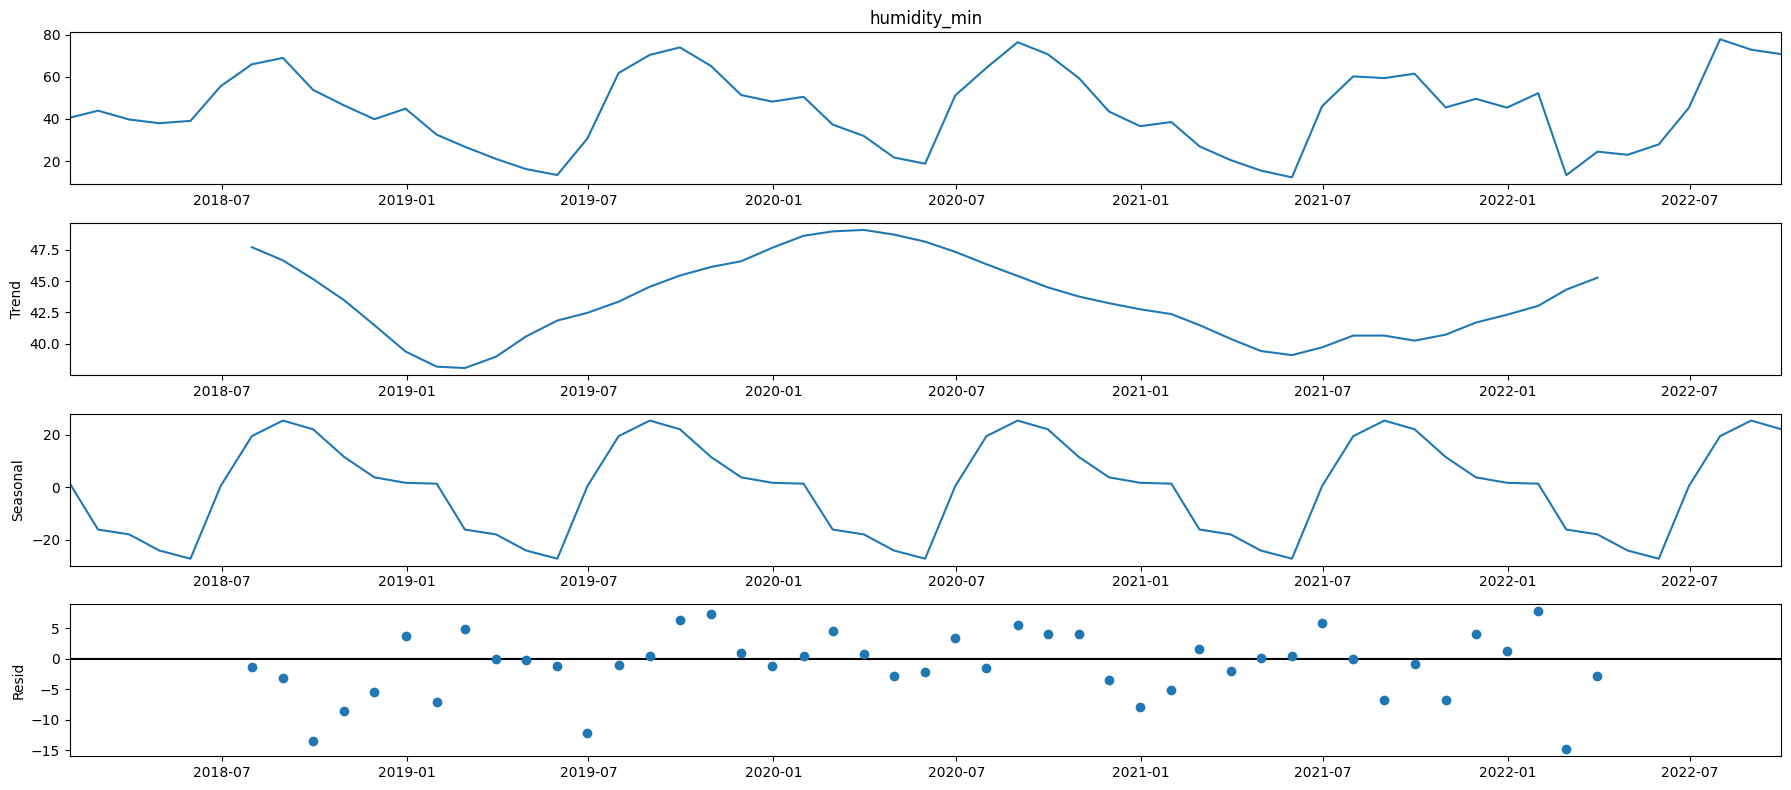

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df['humidity_min'], model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
adfuller(df['humidity_min'])

(-2.7626150397294356,
 0.06381555721419009,
 8,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 343.14002796011323)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

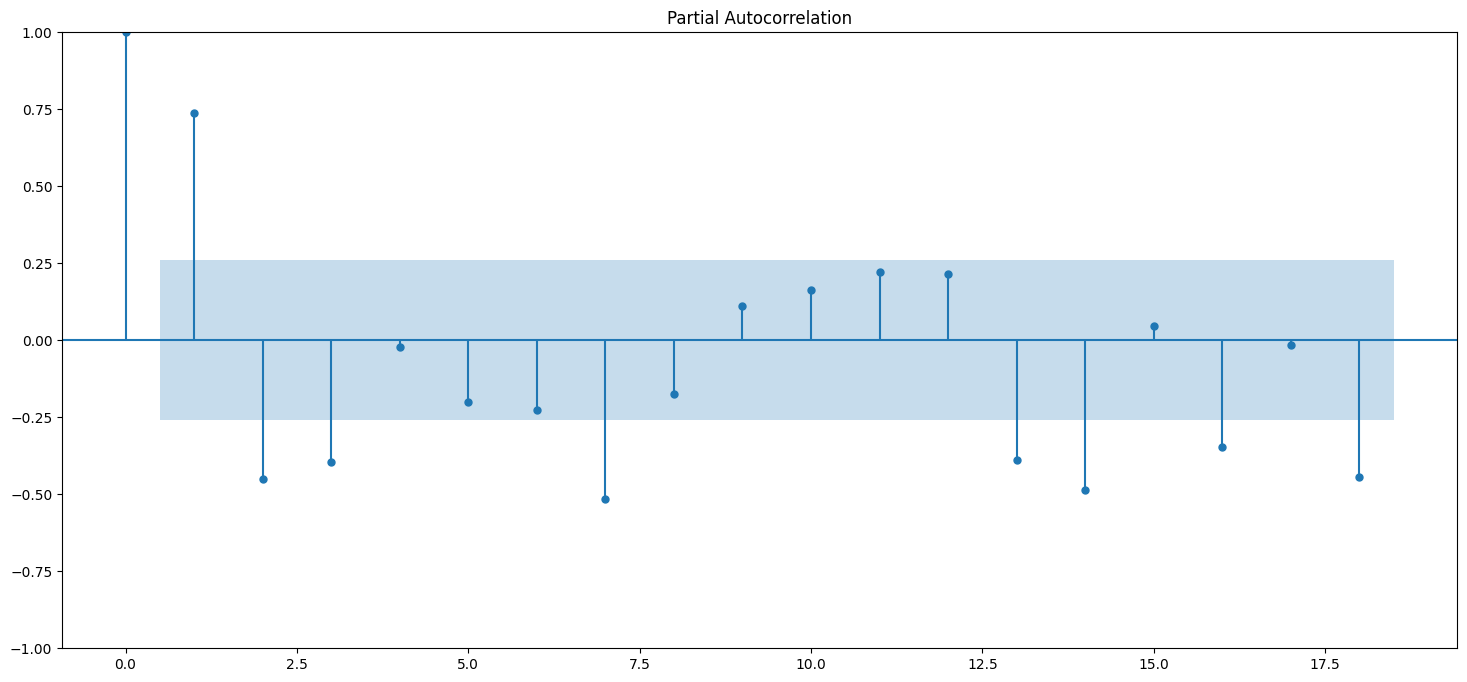

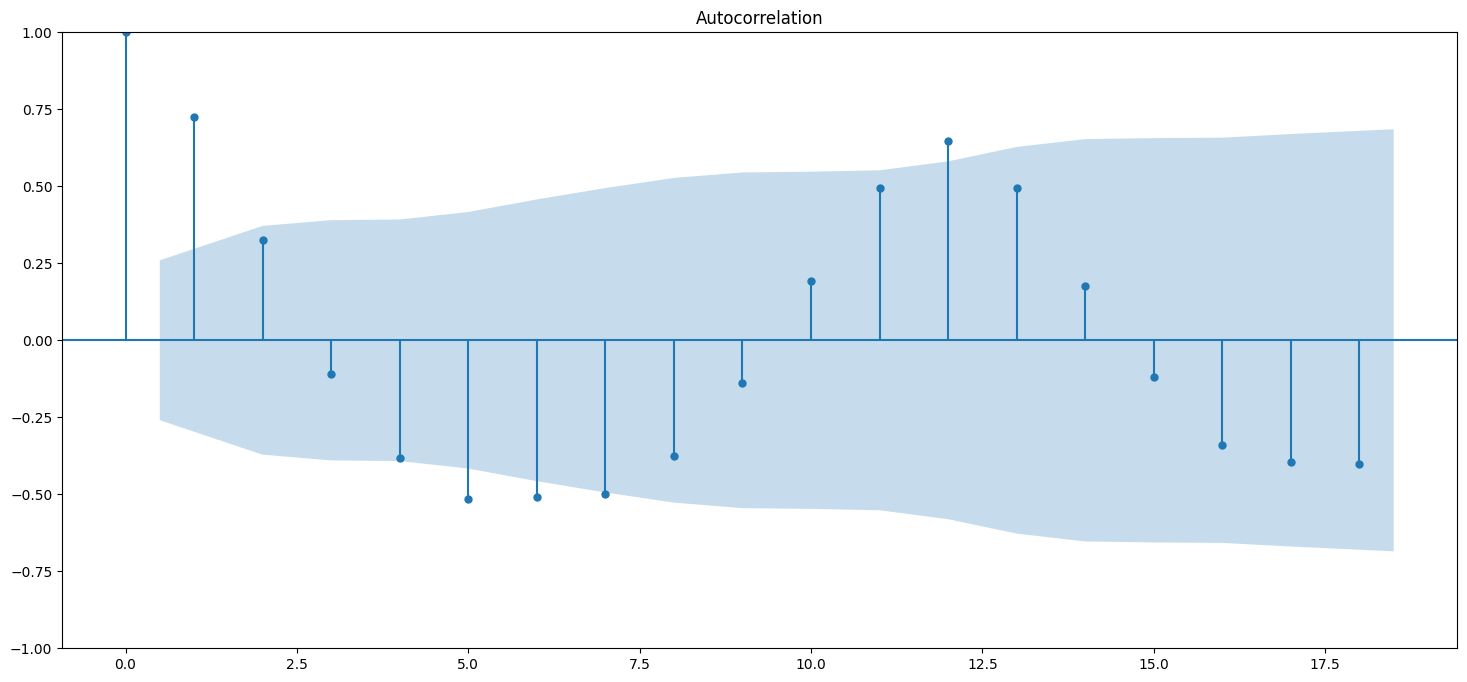

In [10]:
plot_pacf(df['humidity_min'])
plot_acf(df['humidity_min'])
plt.show()

In [11]:
df_diff=df['humidity_min'].diff().diff(12).dropna()

In [12]:
adfuller(df_diff)

(-4.94469648299635,
 2.8521738862344873e-05,
 2,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 240.16319263681157)

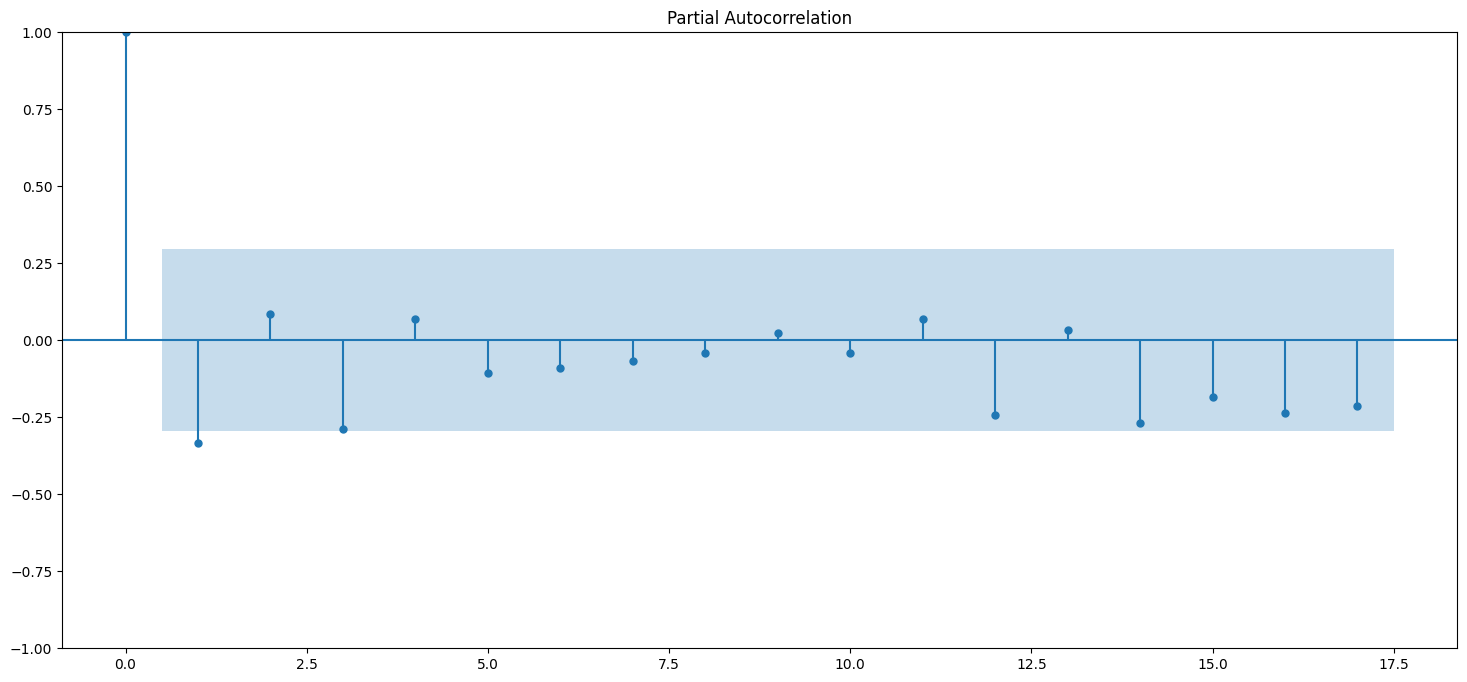

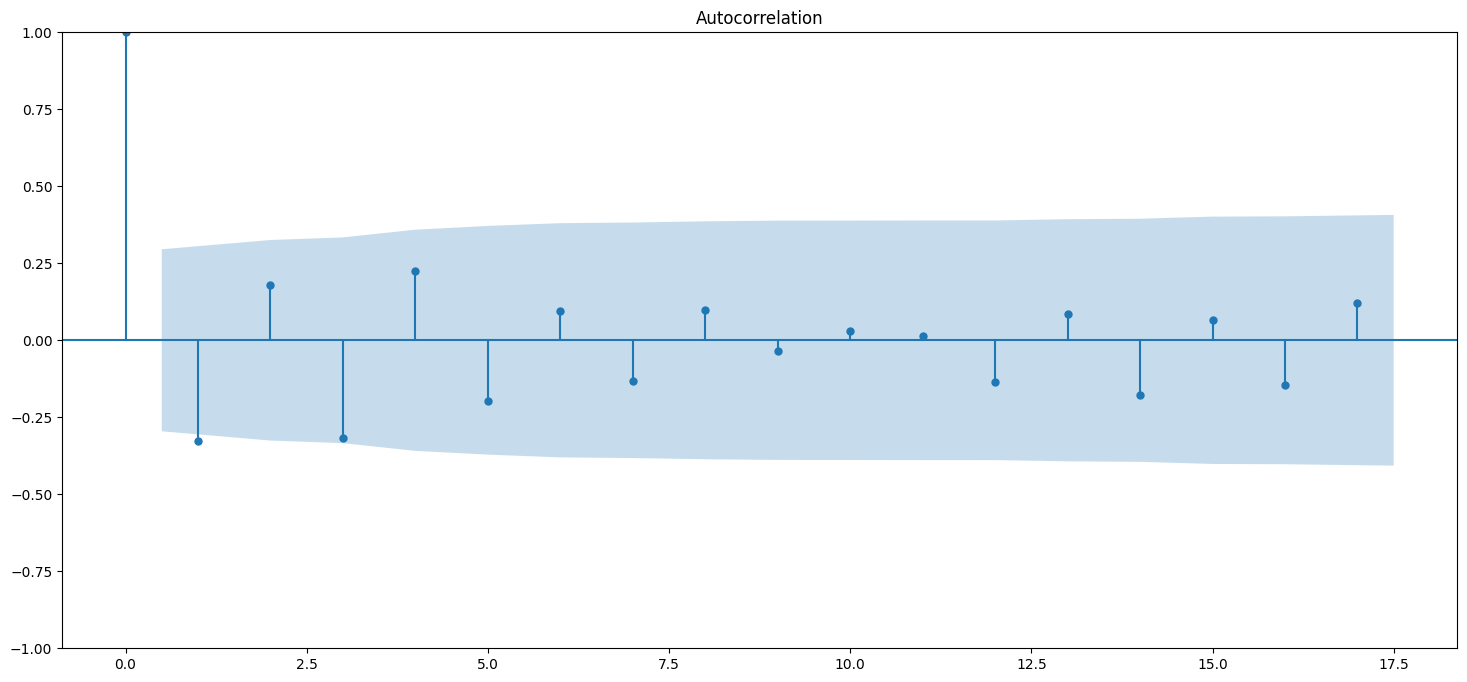

In [13]:
plot_pacf(df_diff)
plot_acf(df_diff)
plt.show()

In [14]:
train=df[:len(df)*80//100]
test=df[len(df)*80//100:]

In [15]:
import itertools

In [16]:
'''p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue'''

"p = range(0, 3)\nd = range(1,2)\nq = range(0, 4)\npdq = list(itertools.product(p, d, q))\nseasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]\nfor param in pdq:\n    for param_seasonal in seasonal_pdq:\n        try:\n            mod = sm.tsa.statespace.SARIMAX(df_diff,\n                                            order=param,\n                                            seasonal_order=param_seasonal,\n                                            )\n            results = mod.fit(method = 'powell')\n            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))\n        except:\n            continue"

In [17]:
model=sm.tsa.statespace.SARIMAX(train['humidity_min'],order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))

In [18]:
model_fit=model.fit()

In [19]:
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])

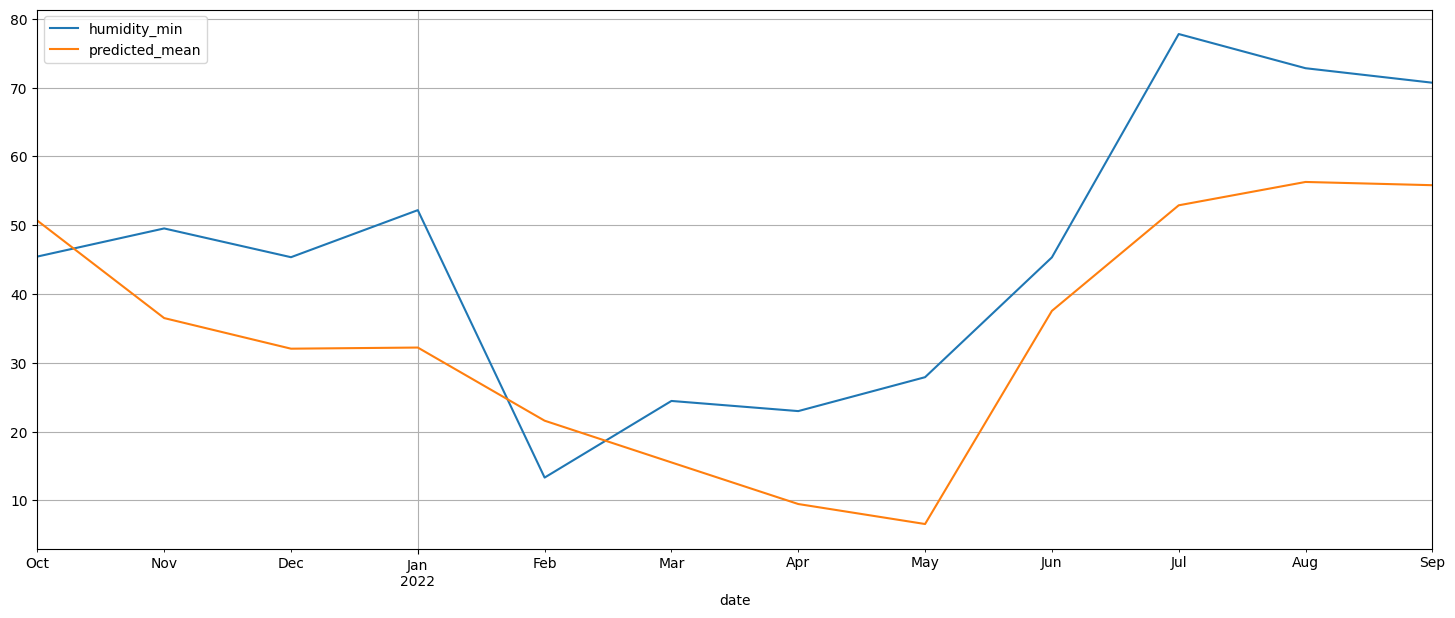

In [20]:
test['humidity_min'].plot(figsize=(18,7),legend=True)
predictions.plot(legend=True)
plt.grid()

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
Mean_Squared_Error=np.sqrt(mean_squared_error(test['humidity_min'],predictions))

In [23]:
Mean_Squared_Error

15.09959296441465

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
Mean_Absolute_Error=mean_absolute_error(test['humidity_min'],predictions)

In [26]:
Mean_Absolute_Error

13.977200647472054

In [27]:
arr1=np.array(Mean_Squared_Error)
arr2=np.array(Mean_Absolute_Error)

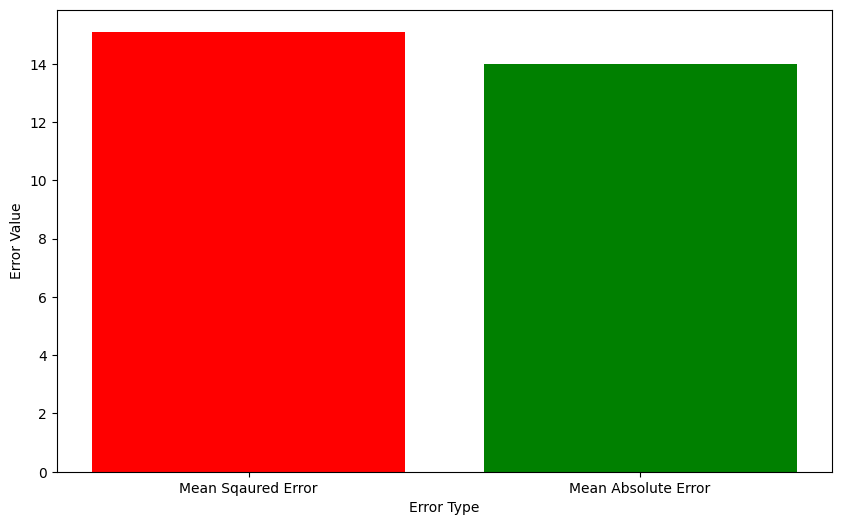

In [28]:
plt.figure(figsize=(10,6))
colors = ['r', 'g']
tick_label=['Mean Sqaured Error','Mean Absolute Error']
plt.bar(['MSE', 'MAE'], [arr1, arr2],tick_label=tick_label,color=colors)
plt.xlabel("Error Type")
plt.ylabel("Error Value")
plt.show()

In [29]:
future=pd.DataFrame(pd.date_range("2022-10-01","2023-09-30",freq='MS'),columns=['date'])

In [30]:
future.set_index('date',inplace=True)

In [31]:
Forecast=model_fit.predict(start=future.index[0],end=future.index[-1])

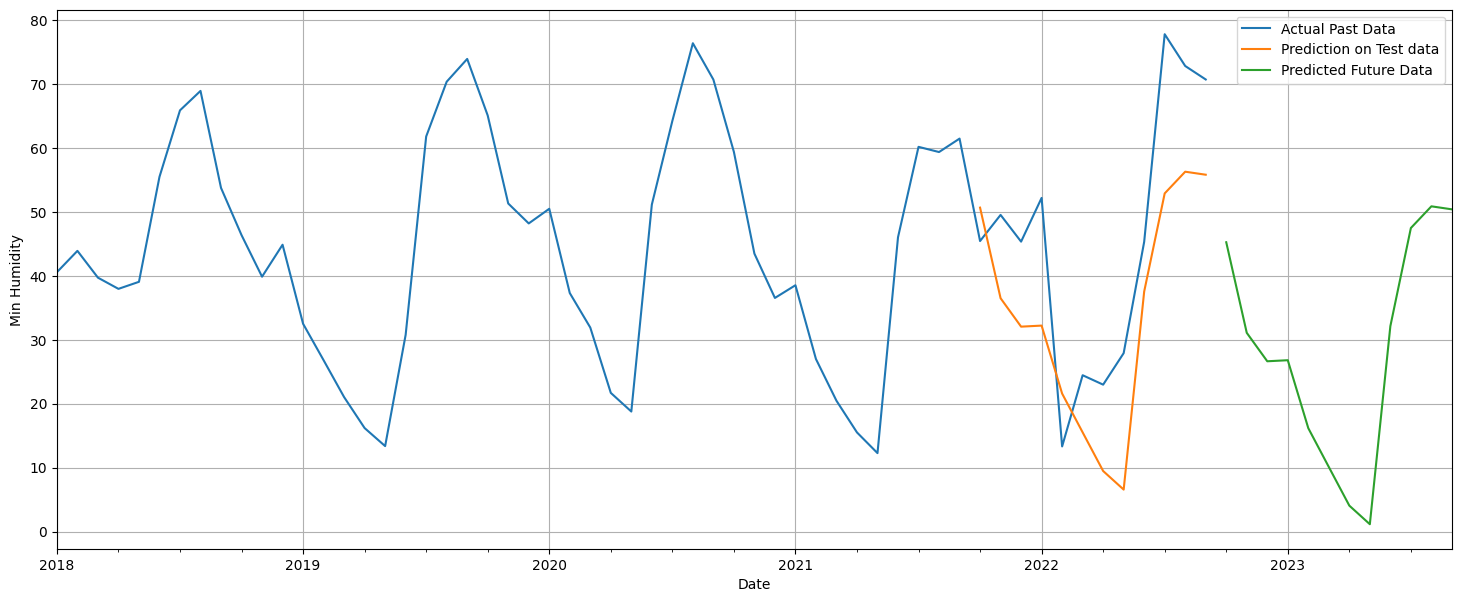

In [33]:
ax=df['humidity_min'].plot(label="Actual Past Data")
predictions.plot(ax=ax,label="Prediction on Test data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Min Humidity")
plt.legend(["Actual Past Data","Prediction on Test data","Predicted Future Data"])
plt.grid()
plt.show()